## Ch11: Random Walk

* timer series는 random walk 인가?
* random walk는 어떻게 예측?

## Random Walk

* Random Walk는 다음 값이 이전 값을 수정한다.
* Random Walk의 간단한 model은 다음과 같다.
* 1. -1or1의 임의의 숫자로 시작한다.
* 2. -1or1을 무작위로 선택하고 이전 시간 단계의 관측치에 추가한다.
* 3. 원하는 만큼 2번의 단계를 반복한다.
위를 토대로 Random Walk는 y(t)=B0+B1X(t-1)+e(t)라는 식으로 작성할 수 있다.
* 여기서 B0는 초기값, b1은 이전 시간 단계에 가중치를 부여하는 계수이며 보통 1로 설정
* x(t-1)은 이전 시간 단계의 관측치, e(t)는 그 당시의 White noise 또는 랜덤값이
다.

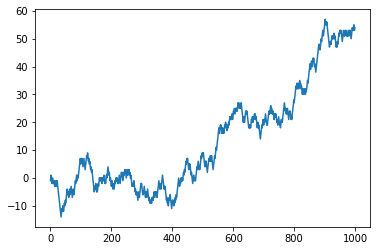

In [3]:
from random import seed
from random import random
import matplotlib.pyplot as plt
seed(1)
random_walk = list()
random_walk.append(-1 if random() < 0.5 else 1)
for i in range(1, 1000):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    
plt.plot(random_walk)
plt.show()


C:\Users\jh\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\misc.py:411: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))


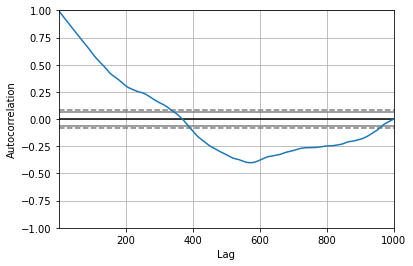

In [4]:
# Random Walk 구성 방식은 높은 자기 상관관계를 가진다.
# Lag가 낮을수록 즉 이전값과가의 상관관계가 높다.
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(random_walk)
plt.show()

## Random Walk and Stationarity
* time series data는 보통 stationary(고정된)이 아니다.
* stationary한 time series는 관측치가 시간에 의존하지 않는 경우이다.
* stationary하지 않다는 것은 time series의 결과값들이 통계적 우연이 될 가능성
이 낮다는 것이다.
* random walk의 관측치가 시간에 의존한다는 것을 알 수 있다.(위의 예시들을
통해)
* 따라서 위 예제들의 random walk또한 stationary하지 않다는 것을 알 수 있다.


** 이를 Augmented Dickey-Fuller test를 통해 확인할 수 있다.
* ADF검정은 time series data가 stationary인지 테스트 하는 방법이다.
* 검증값이 critical value보다 작은 경우 stationary하다고 할 수 있다.
* 또는 P-value가 0.05보다 작으면 stationary하다고 할 수 있다.

In [9]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(random_walk)
print('ADF Statistic: %f' % result[0])
print('p-value : %f' % result[1])
print('Critival Values:')
for key in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# stationary 하지 않은 데이터다

ADF Statistic: 0.341605
p-value : 0.979175
Critival Values:
	('1%', -3.4369127451400474): 54.000
	('5%', -2.864437475834273): 54.000
	('10%', -2.568312754566378): 54.000


adfuller?

Returns
-------
adf : float
    The test statistic.
pvalue : float
    MacKinnon"s approximate p-value based on MacKinnon (1994, 2010).
usedlag : int
    The number of lags used.
nobs : int
    The number of observations used for the ADF regression and calculation
    of the critical values.
critical values : dict
    Critical values for the test statistic at the 1 %, 5 %, and 10 %
    levels. Based on MacKinnon (2010).
icbest : float
    The maximized information criterion if autolag is not None.
resstore : ResultStore, optional
    A dummy class with results attached as attributes.
    
   
  
* 차이를 고려해서 random walk를 고정시킬 수 있다.
* 시간과 관계없이 -1or1로 고정시키는 예제이다.
* 하지만 일련의 -1과 1의 무작위 이외에는 작업할 정보다 없다.
* 만든 랜덤워크를 현재값 - 이전값을 시켜보자

## random walk 예측해보기

* 합리적인 예측은 불가능
* 이전 시간단계의 관찰 이용해서 다음단계를 예측
* 이를 naive forecast, persistence model 이라고 부른다


In [20]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_size = int(len(random_walk) * 0.66) # 원래 random walk를 2/3 만큼만 train set으로
train, test = random_walk[0:train_size], random_walk[train_size:]

predictions = list()
history = train[-1]
for i in range(len(test)):
    yhat = history
    predictions.append(yhat)
    history = test[i]

rmse = sqrt(mean_squared_error(test, predictions))
print('Persistence RMSE : %.3f' % rmse)

Persistence RMSE : 1.000


## Ch:12. Decompose Time Series Data
Chapter 12에서는
* Time Series decomposition method of analysis(시계열 분해 분석 방법) 및forecasting에 도움이 될만한 방법
* Python에서 Time Series data를 자동으로 decompose(분해)하는 방법
* addtive and multiplicative time series problem을 decompose하고 결과를plotting하는 방법을 배운다

* 어떤 특성들을 제거하는 방법?

## Time Series Components
* forecasting method를 선택하는 데 Time Series가 Systematic(체계적), Non-Systematic(비체계적)인 구성 요소로 나누는 것은 유용하다.
* Systematic : 일관성 또는 반복이 있고 설명 및 modeling할 수 있는 time seriescomponents
* Non-Systematic : 직접 modeling할 수 없는 time series components
* Level : series의 평균 값
* Trend : series의 증가 또는 감소 값
* Seasonality : series에서 반복되는 주기(short-term)
* Noise : series의 랜덤 변동

* 위의 네가지 components를 보면 Level, Trend, Seasonality는 systematic하고noise는 non-systematic한 것을 알 수 있다.
* 따라서 Time Series components는 세 가지의 systematic, 한 가지의 non-systematic components로 구성된 것이다.

## Combining(결합) Time Series Components
* Series는 위에서 언급한 네 가지 구성 요소의 집합or조합이다.
* 모든 Series는 level과 noise가 있으며 trend와 seasonality는 있는 것도 있고 없는 것도 있다.
* 구성 요소를 addtive or multiplicative로 combining하는 것으로 생각하면 도움이 된다.

## Additive Model
* y(t) = Level + Trend + Seasonality + Noise
* Additive Model은 구성 요소들이 덧셈으로 이루어진 model이며 선형 직선이다
* seasonality도 동일한 빈도와 진폭을 갖는다.

## Multiplicative Model
y(t) = Level * Trend * Seasonality * Noise
* Multiplicative Model은 구성 요소들이 곱셈으로 이루어진 model이며 2차or지
수함수와 같은 비선형이다.
* seasonality 또한 비선형이기에 시간이 지남에 따라 빈도와 진폭이 바뀐다.

## Decomposition as a Tool
* 분해는 주로 시계열 분석에 사용되며 분석 도구로 예측 모델로 주어진 문제를
알려주는데 사용할 수 있다.
* 일반적으로 모델링 복잡성 측면or특정 모델에서 구성 요소를 가장 잘 포착하는
방법 측면에서 시계열 예측 문제에 대해 구조화된 사고 방식을 제공한다

## Automatic Time Series Decomposition
* statsmodels library에서 제공하는 season_decompose()함수를 통해 분해를 할
수 있다.
* 위의 함수에서 덧셈or곱셈 분해를 지정하고 그에 따른 결과를 낸다.
* time series plot과 일부 요약 통계를 활용하여 time series 모형이 곱셈인지 덧
셈인지 파악하고 위 함수에 그것을 적용시킨다.
* 결과로는 observed, trend, seasonal, residual의 data를 반환한다.
* residual(잔차)는 표본에 대한 추정값과 실제 관측값의 차이다.
* 즉, 이 경우에서는 원시 dataset과 trend의 차이라고 보면 된다.

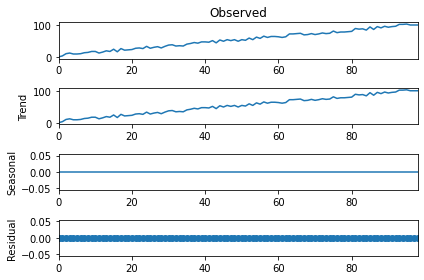

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
from random import randrange

series = [i+ randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model= 'additive', period= 1) #series dataset에서 pa


result.plot()
plt.show()

# 주기적인 특성이 없다.

## Multiplicative Decomposition

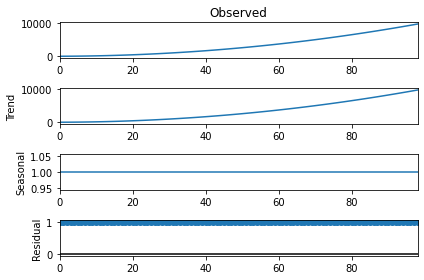

In [32]:
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=1)
result.plot()
plt.show()

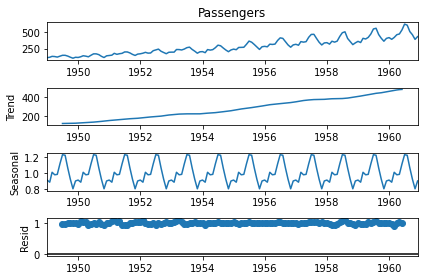

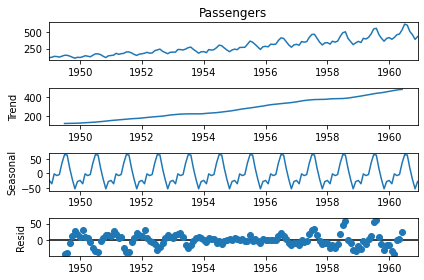

In [37]:
import pandas as pd

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0,
                    parse_dates=True, squeeze=True)

result = seasonal_decompose(series, model= 'multiplicative') # multiplicative
result.plot()
plt.show()
#################################
print('\n')
result1 = seasonal_decompose(series, model= 'additive') #additive
result1.plot()
plt.show()


## Chapter 13. Use and Remove Trends
Chapter 13에서는
* Time Series에 존재할 수 있는 trend의 중요성과 유형 및 식별 방법
* simple differencing method를 사용하여 trend를 제거하는 방법
* 선형 trend를 modeling하고 판매 Time Series dataset에서 제거하는 방법

## Trends in Time Series
* trend는 일반적으로 주기적이지 않은 시계열의 체계적인 변화를 말한다.
* trend를 파악하고 이해하면 모델 성능 향상에 도움이 된다.
* 1. Faster Modeling : 모델 선택 및 평가를 보다 효율적으로 만들 수 있다.
* 2. Simpler Problem : 모델링을 단순화하고 모델 성능을 향상시키기 위해 trend를 수정하거나 제거할 수 있다.
* 3. More Data : 모델에 추가 정보를 제공하고 모델 성능을 향상시키기 위해trend 정보를 직접 또는 요약으로 사용할 수 있다.


## Types of Trends
Two general classes
* 1. Deterministic Trends(결정론적 추세) : 지속적으로 증가or감소하는 trend
* 2. Stochastic Trends(확률적 추세) : 일관성없이 증가or감소하는 trend
일반적으로 결정적 추세는 식별하고 제거하기 쉽지만, 아래에서 배울 방법에는확률적 추세가 더 유용할 것이다.
scope of observations(관찰 범위측면)
1. Global Trends : 전체 time series에 적용되는 trend
2. Local Trends : Time Series의 일부 또는 subsequences에 적용되는 trend
일반적으로 Global trends는 식별 및 해결하기 더 쉽다.

## Identifying a Trend
* Time Series data를 plotting해서 trend를 파악할 수 있다.
* 하지만 이는 실제로 trend를 식별하는 것이 주관적인 프로세스가 될 수 있다.
* 따라서 Time Series에서 추출하거나 제거하는 것도 주관적일 수 있다.

## Removing a Trend
* trend가 있는 time series를 non-stationary라고 부른다.
* 식별된 trend는 modeling이 가능하며 modeling 후에 time series dataset에서
제거할 수 있다.
* dataset에 trend가 없거나 제거된 경우 이 dataset을 trend stationary라고 한
다.

## Using Time Series Trends in Machine Learning
* machine learning 관점에서 trend는 2가지 기회를 나타낸다.
* 1. Remove Information : 입력 변수와 출력 변수 간의 관계를 왜곡하는 체계적
인 정보를 제거
* 2. Add Information : 입력 변수와 출력 변수 간의 관계를 개선하기 위해 체계적
인 정보를 추가

## shampoo dataset

<ipython-input-53-68fce9195cec>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


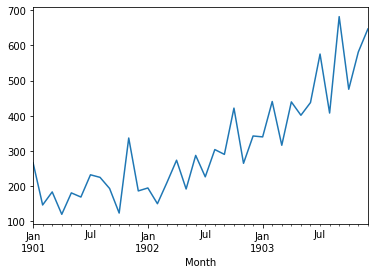

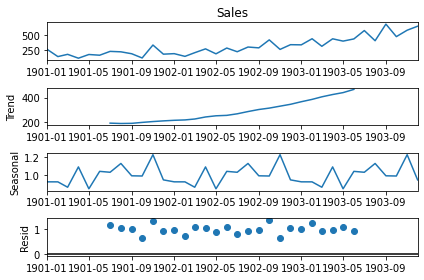

In [53]:
from pandas import datetime

def parser(x):
    return datetime. strptime('190'+ x, '%Y-%m')


series = pd.read_csv('dataset/shampoo.csv', header= 0, parse_dates= [0], 
                  index_col= 0, squeeze = True, date_parser= parser)
series.plot()
plt.show()

result1 = seasonal_decompose(series, model= 'multiplicative') #additive
result1.plot()
plt.show()

## Detrend by Differencing

* 값에서 trend를 제거. 차를 참으로써
* time series tend를 제거하는 가장 간단한 방법은 차이를 이용하는 것이다.
* 현재 시간 단계의 값이 원래 관측치와 이전 시간 단계의 관측치 간의 차이로 계
산되는 새 series를 구성된다.
* value(t) = observation(t) - observation(t-1)
* 이전 시간을 이용하여 새로운 series를 만들기 때문에 첫번째 관측치는 계산할
수 없어 원시 dataset보다 하나의 data가 적다.

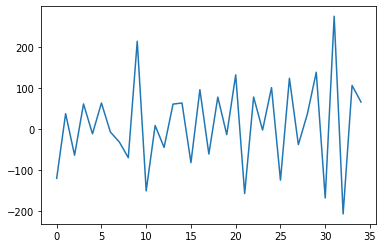

In [55]:
X = series.values
diff = list()
for i in range(1, len(X)):
    value = X[i] - X[i -1]
    diff.append(value)
plt.plot(diff)
plt.show()

# 증가하는 트렌드를 없애고 순간 값만 본다 ?

## Detrend by Model Fitting
* trend는 선으로 쉽게 시각화되는 경우가 많다.
* linear한 trend는 linear model로 요약할 수 있고 비선형 trend는 다항식 등으로
요약할 수 있다.
* 아래의 예제는 trend를 통해 trend를 제거하는 방법이다.
* LinearRegression()함수를 사용하여 linear한 trend를 생성하고, 원시 data에서
뺌으로서 trend를 제거한다.

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]


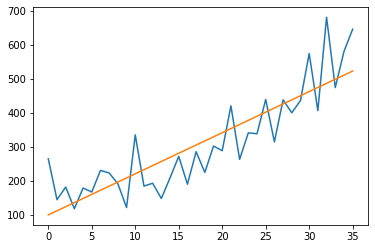

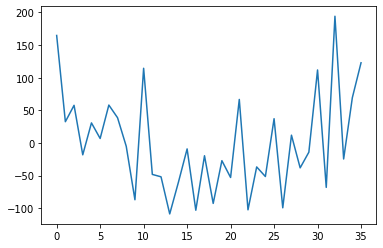

In [72]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(series))]
series = pd.read_csv('dataset/shampoo.csv', header= 0, parse_dates= [0], 
                  index_col= 0, squeeze = True, date_parser= parser)
print(X)
X = np.reshape(X, (len(X), 1))
y = series.values

model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

plt.plot(y)
plt.plot(trend)
plt.show()

detrended = [y[i] - trend[i] for i in range(0, len(series))]

plt.plot(detrended)
plt.show()


## Chapter 14. Use and Remove Seasonality
Chapter 14에서는
* Time Series의 seasonality 정의 및 machine learning method을 통한 예측에 제공되는 방법
* difference method를 사용하여 season별로 조정된 일일 온도 데이터의 timeseries 만드는 방법
* seasonal component를 직접 modeling하고 관측치에서 빼는 방법

## Seasonality in Time Series
* Time Series에는 seasonal variation이 포함될 수 있다.
* seasonal variation or seasonality는 시간이 지남에 따라 반복되는 주기이다.

## Benefits to Machine Learning
* Time Series의 seasonal component를 이해하면 machine learning을 통한modeling 성능 향상이 가능하다.
* 이는 두 가지 주요 방법으로 성능을 향상시킬 수 있다.
* 1. Clearer Signal : 계절 성분을 식별하고 제거하면 입력 변수와 출력 변수 간의
관계가 더 명확해질 수 있다.
* 2. More Information : 계절적 구성 요소에 대한 추가 정보는 모델 성능 개선을
위한 새로운 정보를 제공할 수 있다.

## Types of Seasonality
* 1. Time of Day
* 2. Daily
* 3. Weekly
* 4. Monthly
* 5. Yearly 등등
* 따라서 Time Series에서 seasonality component가 있는지 확인하는 것은 주관
적이다.
* 확인하는 가장 간단한 방법은 plotting하는 것이다.

## Removing Seasonality
* Time Series에서 계절 성분을 제거된 것을 계절 고정이라고 한다. 명확한 계절
성분이 있는 Time Series는 non-stationary이라고 한다.



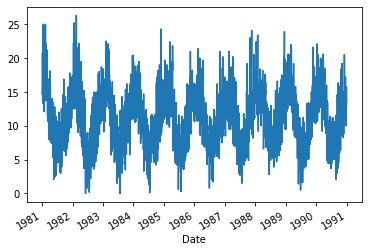

In [75]:
series = pd.read_csv('./dataset/daily-minimum-temperatures.csv', header= 0, 
                  index_col= 0,parse_dates = True, squeeze=True)
series.plot()
plt.show()

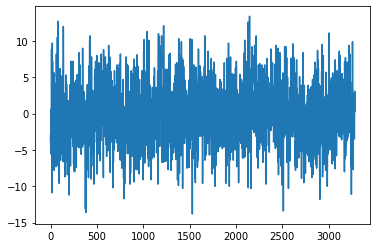

In [82]:
X = series.values
diff = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
    value = X[i] - X[i - days_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
1981-06-30     7.306667
1981-07-31     7.577419
1981-08-31     7.238710
1981-09-30    10.143333
1981-10-31    10.087097
1981-11-30    11.890000
1981-12-31    13.680645
1982-01-31    16.567742
Freq: M, Name: Temp, dtype: float64


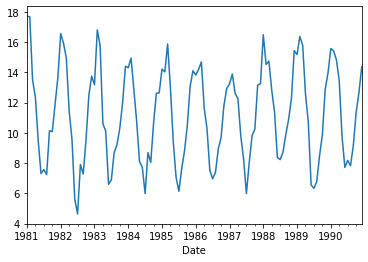

In [85]:
# downsampling 

resample = series. resample('M')
monthly_mean = resample. mean()
print(monthly_mean. head(13))
monthly_mean.plot()
plt.show()

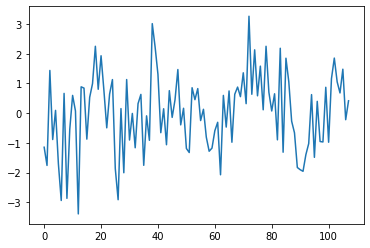

In [86]:
X = series. values
diff = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
    value = monthly_mean[i] - monthly_mean[i - months_in_year]
    diff.append(value)
plt.plot(diff)
plt.show()

## Stationary Time Series

* stationary하다는 말은 time series가 시간에 의존하지 않는다는 말이다.
* time series가 trend, seasonal effect가 없는 경우 stationary하다.
* 아래의 예제는 일별 여성 출생수에 대한 dataset이다.

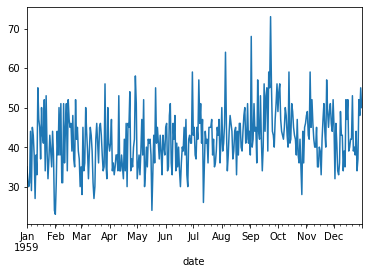

In [89]:
series = pd.read_csv('daily-total-female-births.csv', header= 0, index_col= 0,
                  parse_dates = True, squeeze=True)
series.plot()
plt.show()

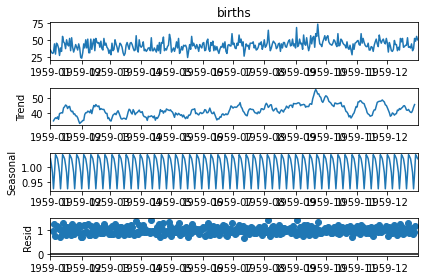

In [94]:
if 1:
    from statsmodels.tsa.seasonal import seasonal_decompose
    series = pd.read_csv('daily-total-female-births.csv', header= 0, index_col= 0,
                         parse_dates = True, squeeze=True)
    result = seasonal_decompose(series, model= 'multiplicative') #additive multiplicat
    result.plot()
    plt.show()
    # 주기성이 없음 -> stationary 하다

## Stationary Time Series and Forecasting

* trend, seasonaliry를 제거함으로써 statinary한 time series를 만들면,
* 예측하는데 있어서 데이터의 더 명확한 신호를 통해 이점을 얻을 수 있다.

## Checks for Stationarity
* Look at Plots : 데이터를 시각화해서 stationary한 지 알 수 있다.
* Summary Statistics : 데이터에 대한 요약 통계를 냄으로써 stationary한 지 알
수 있다.
* Statistical Tests : 통계 테스트를 사용하여 stationarity에 대한 기대치를 충족했
는 지 확인가능하다.

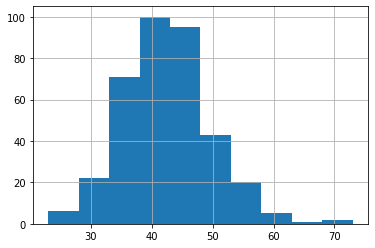

In [96]:
series.hist()
plt.show()

# 가우시안 따르고, 평균과 분산이 크지 않으므로 stationary 하다